# Netflix Titles

In [89]:
#First import the necessary libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from string import punctuation

In [51]:
location = "netflix_titles.csv"
netflix_df = pd.read_csv(location)

In [7]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [9]:
netflix_df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


In [52]:
netflix_df = netflix_df.drop(['show_id'], axis=1)
netflix_df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [11]:
netflix_df.count()

type            6234
title           6234
director        4265
country         5758
date_added      6223
release_year    6234
rating          6224
duration        6234
listed_in       6234
dtype: int64

In [15]:
netflix_df.shape

(6234, 10)

In [21]:
subset = netflix_df[['type','title','director','country','release_year']]

In [22]:
subset.head()

,type,title,director,country,release_year
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","United States, India, South Korea, China",2019
1,Movie,Jandino: Whatever it Takes,NaN,United Kingdom,2016
2,TV Show,Transformers Prime,NaN,United States,2013
3,TV Show,Transformers: Robots in Disguise,NaN,United States,2016
4,Movie,#realityhigh,Fernando Lebrija,United States,2017


In [30]:
netflix_df.loc[(netflix_df['release_year'] == 2019) & (netflix_df['rating']) , ['date_added','release_year','rating'] ]

,date_added,release_year,rating
0,"September 9, 2019",2019,TV-PG
34,"September 6, 2019",2019,TV-Y7
35,"September 6, 2019",2019,TV-MA
38,"September 6, 2019",2019,TV-14
39,"September 6, 2019",2019,TV-MA
...,...,...,...
6198,"April 26, 2019",2019,TV-MA
6204,"April 19, 2019",2019,TV-14
6206,"April 19, 2019",2019,TV-MA
6215,"April 13, 2019",2019,TV-14


In [31]:
netflix_df.isnull().sum()

type               0
title              0
director        1969
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
show_type          0
dtype: int64

A significant amount of data is missing on the directors, so I will not focus on that portion of the data as much. 
There is also missing data for country, date added and rating, but it is only a small portion of the data (less than 20%).

In [33]:
#removing duplicated data
duplicated = netflix_df.duplicated()
netflix_df[duplicated]

,type,title,director,country,date_added,release_year,rating,duration,listed_in,show_type
2124,Movie,Sarkar,A.R. Murugadoss,India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",0


In [34]:
remove_dup = netflix_df.drop_duplicates()
remove_dup.count()

type            6233
title           6233
director        4264
country         5757
date_added      6222
release_year    6233
rating          6223
duration        6233
listed_in       6233
show_type       6233
dtype: int64

# Graphs & Visualizations

Text(0.5, 1.0, 'Netflix Ratings')

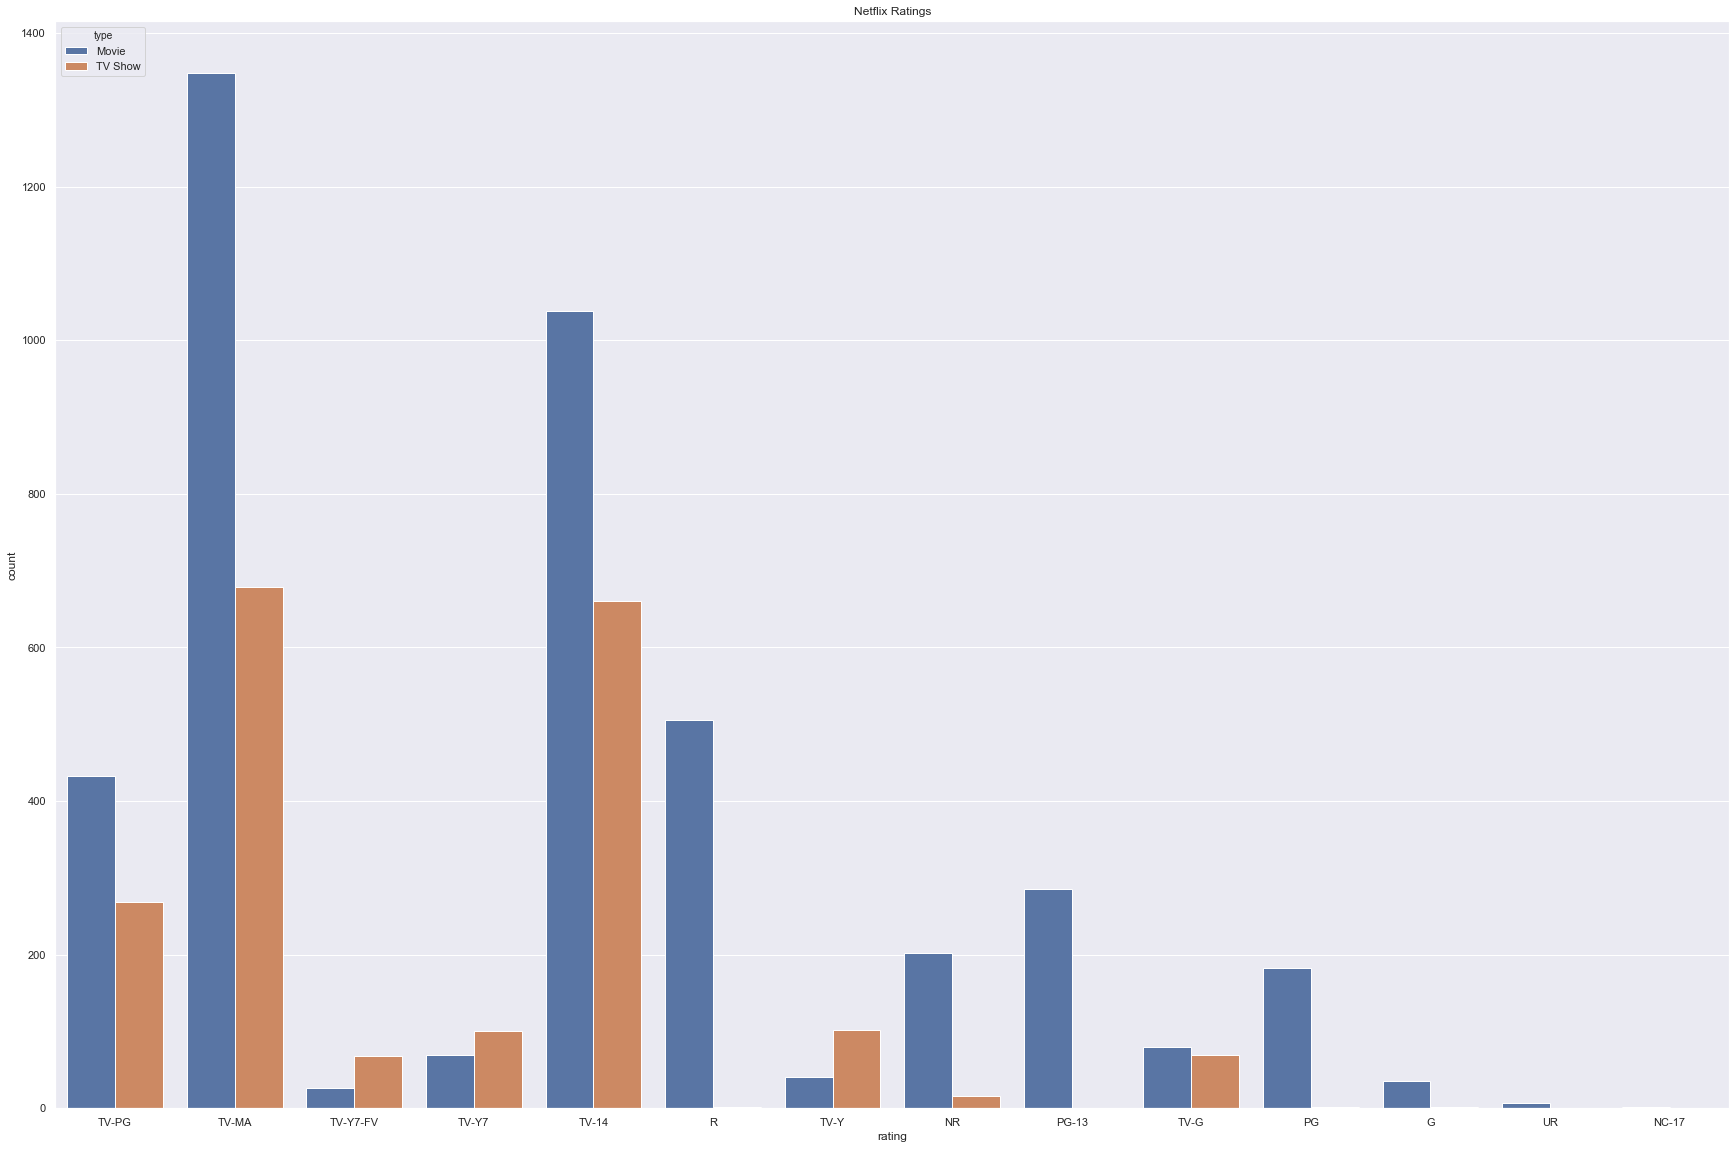

In [126]:
plt.figure(figsize=(30,20))
sns.countplot(x =netflix_df['rating'], hue = netflix_df['type'], data = netflix_df)
plt.title("Netflix Ratings")

The most added types of content to Netflix is TV-PG , TV-MA & TV-14 for both movies and TV content. Netflix appears to be focusing on these types of content the most.

Text(0.5, 1.0, 'Netflix Titles by Release Year')

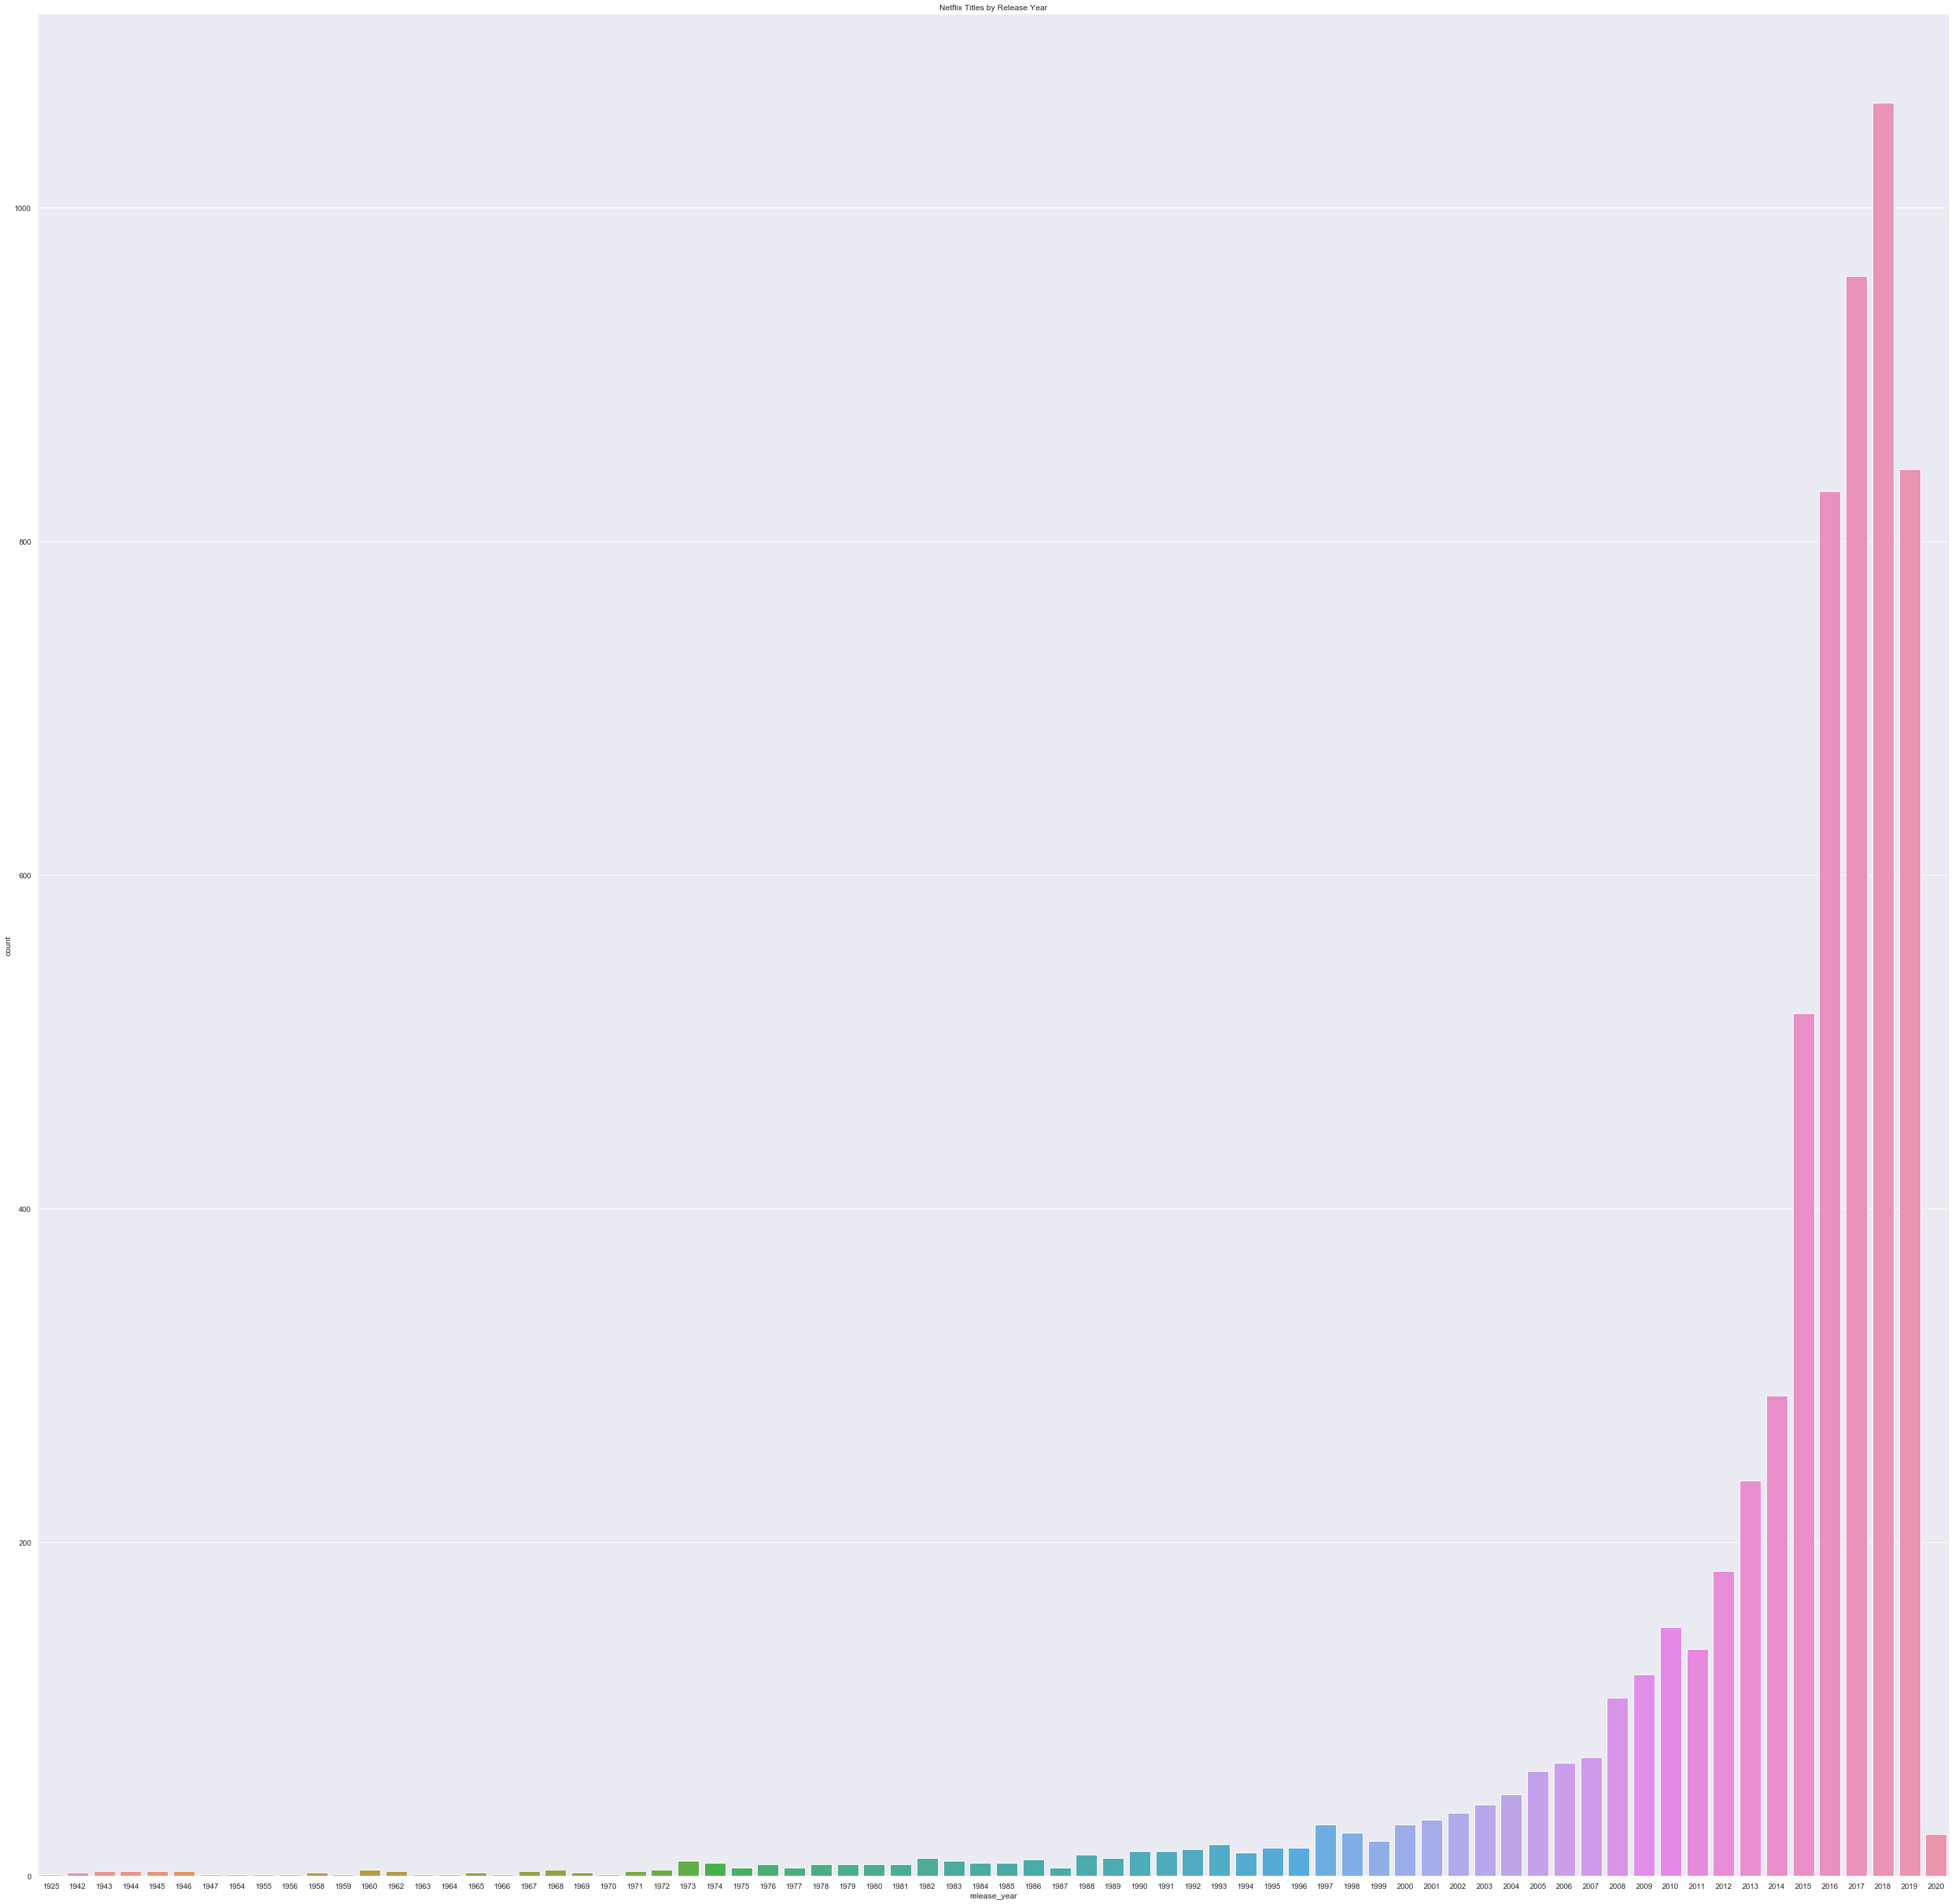

In [74]:
plt.figure(figsize=(50,50))
sns.countplot(x=netflix_df['release_year'], data=netflix_df)
plt.title('Netflix Titles by Release Year')

Text(0.5, 1.0, 'Titles by Release Year and based on types of content')

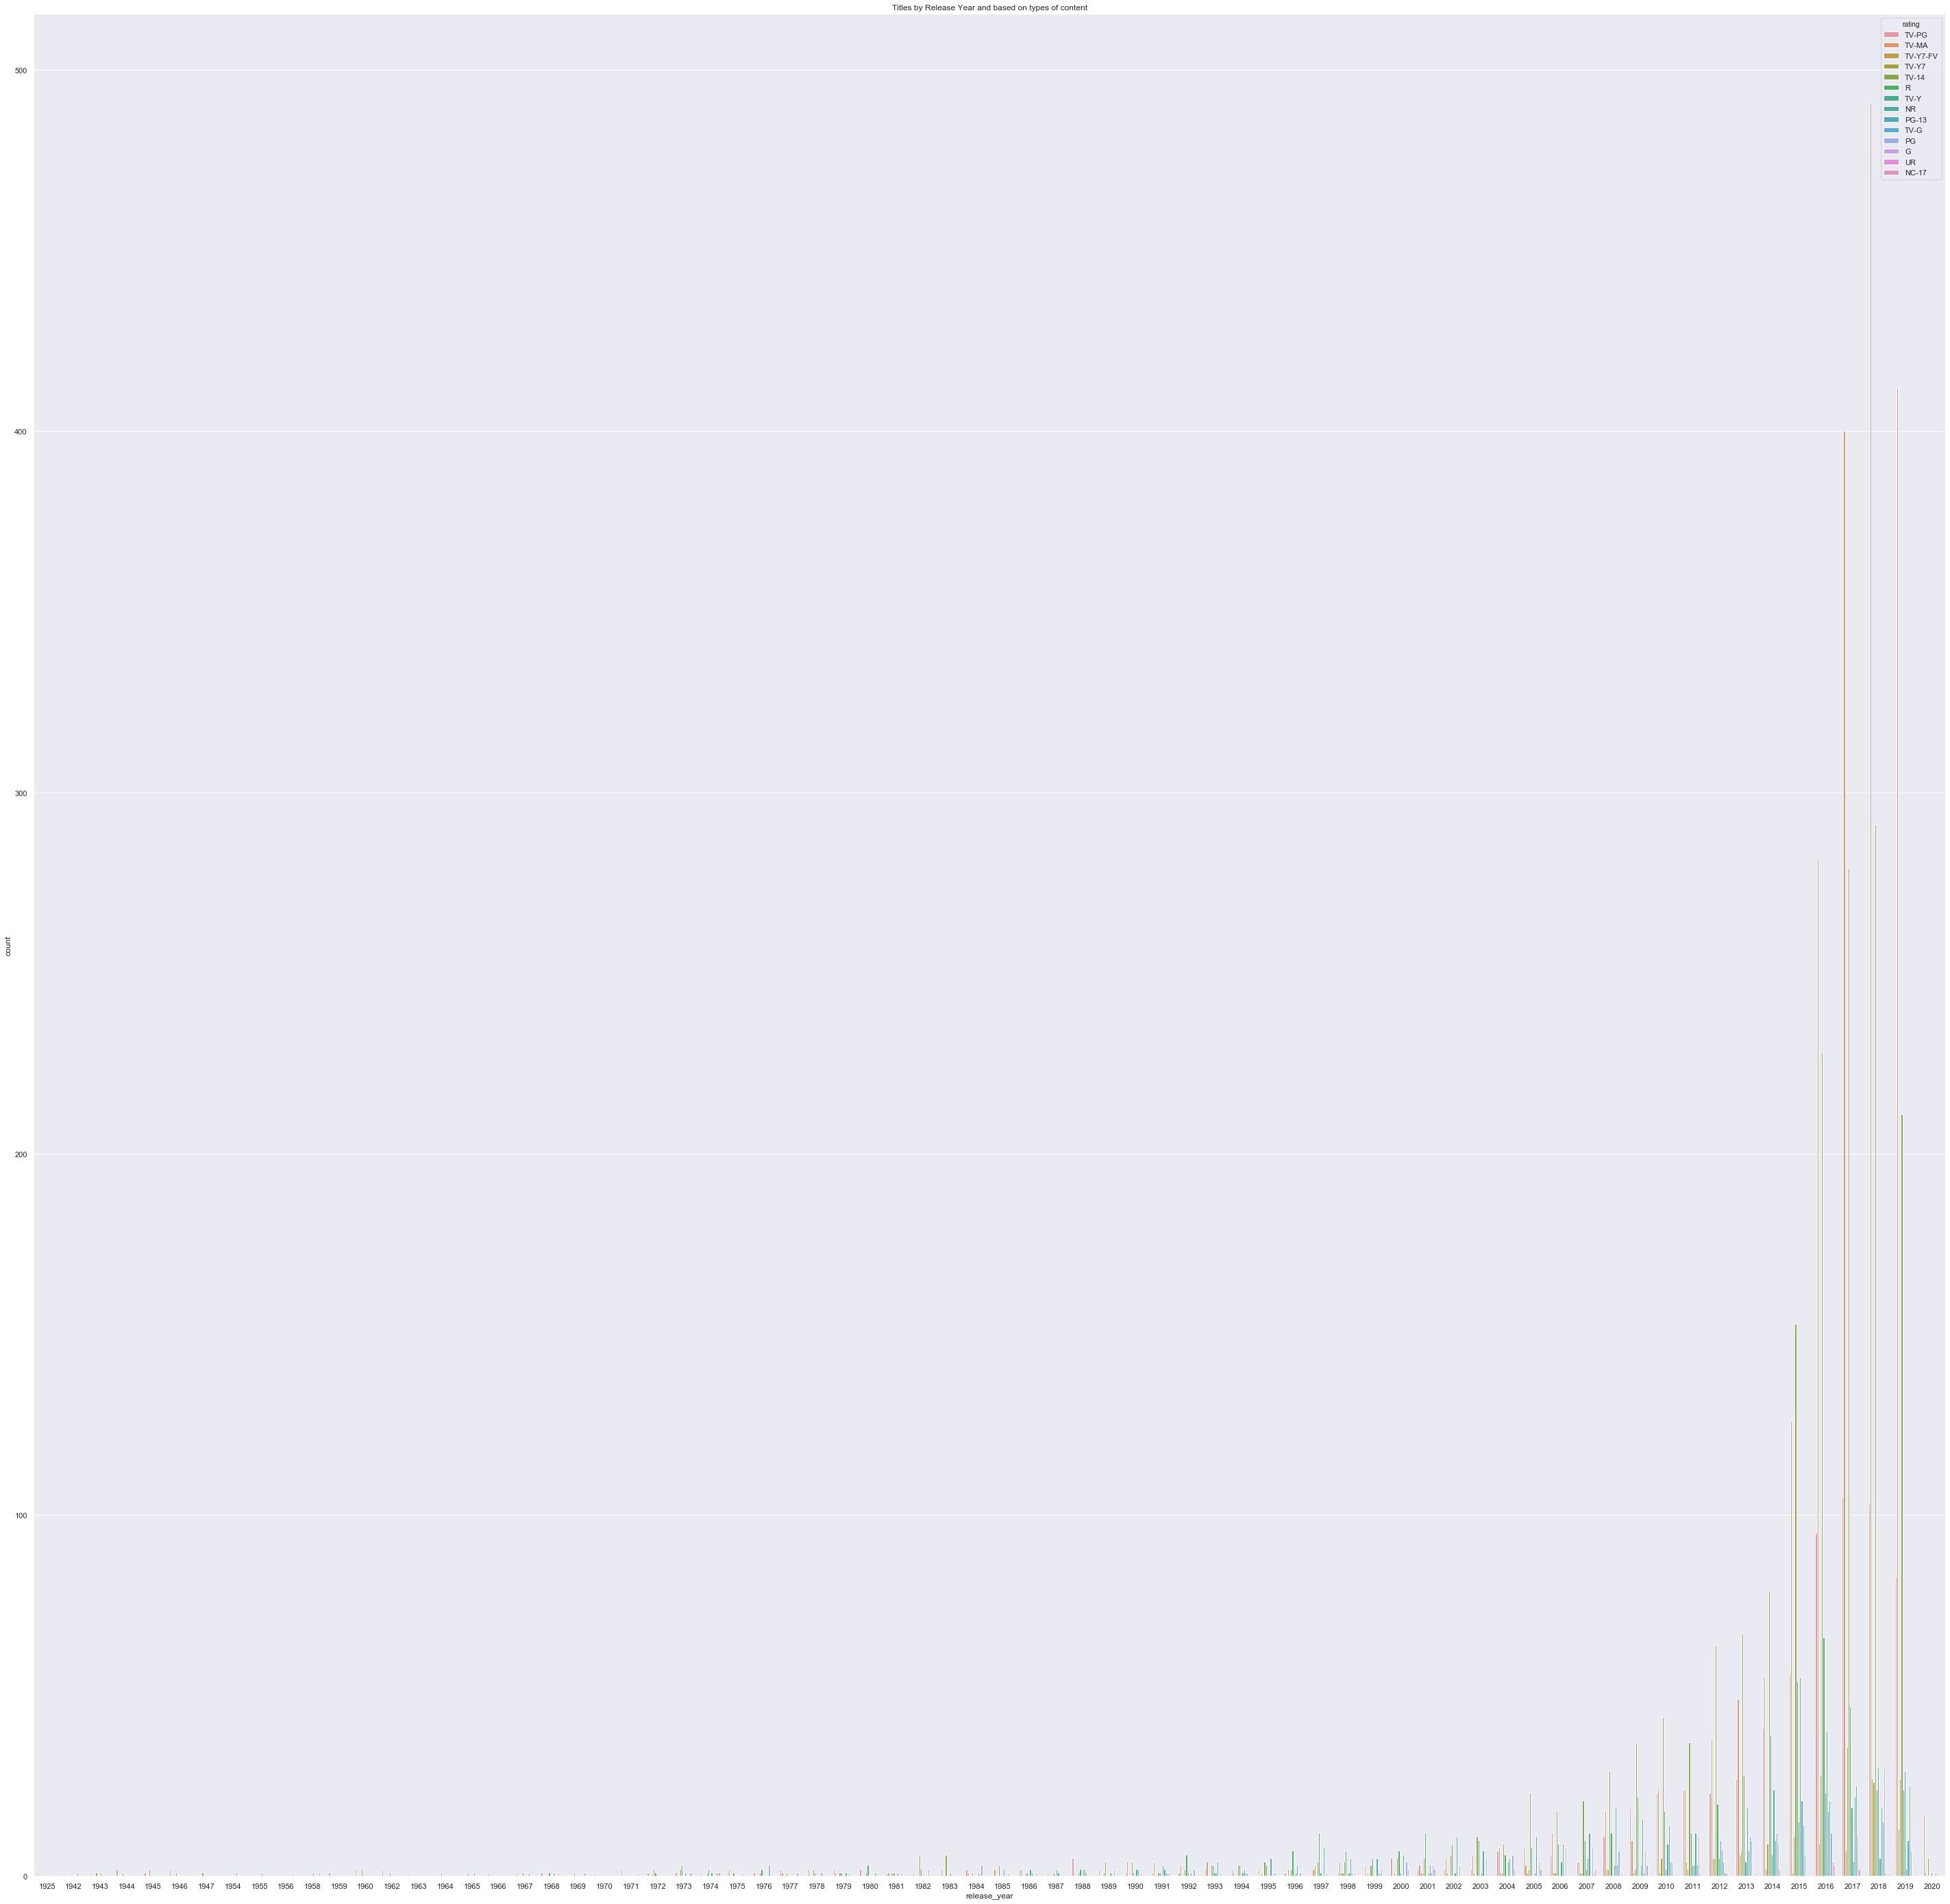

In [137]:
plt.figure(figsize=(50,50))
sns.countplot(x=netflix_df['release_year'], hue = netflix_df['rating'], data=netflix_df)
plt.title('Titles by Release Year and based on types of content')

Most Netflix content is new with the majority of it being content that was made after 2010 & a large amount of it being rated TV-MA.

Text(0.5, 1.0, 'Movies vs TV Shows')

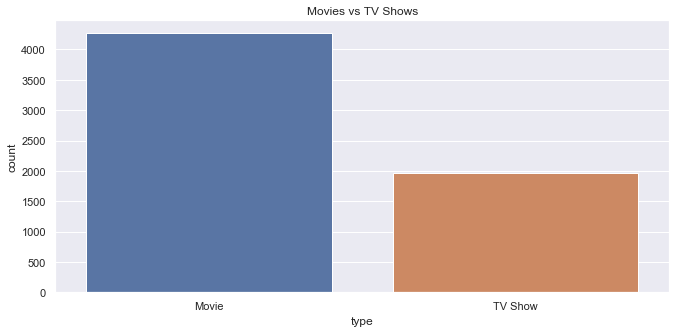

In [71]:
sns.countplot(x=netflix_df['type'], data=netflix_df)
plt.title('Movies vs TV Shows')

Movie content outweighs TV content on Netflix